In [360]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

script_dir = os.getcwd()
dataset_path = os.path.join(script_dir, '..', 'depression_data.csv')
data = pd.read_csv(dataset_path)

data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


**EDA Steps**

**Feature engineering, Dropping the 'Name' column to protect users privacy and because it is an unneccesary feature that is causally
impotent and cannot effect our response variable.** 

In [363]:
data.drop(columns=['Name'], inplace=True)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


**Displaying general characteristics of the quantititative features: 'Age', 'Number of Children' and 'Income'**

In [365]:
summaryAge = data['Age'].describe()
print(summaryAge)

count    413768.000000
mean         49.000713
std          18.158759
min          18.000000
25%          33.000000
50%          49.000000
75%          65.000000
max          80.000000
Name: Age, dtype: float64


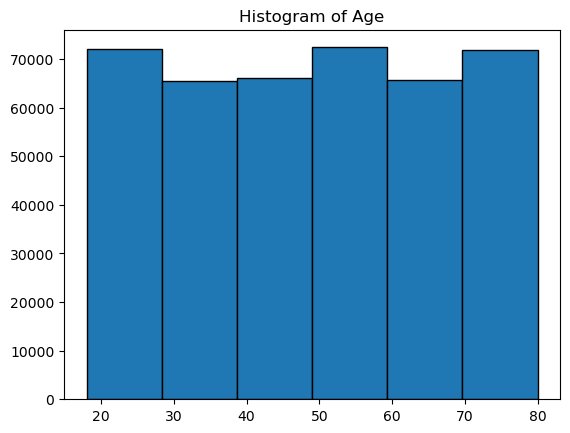

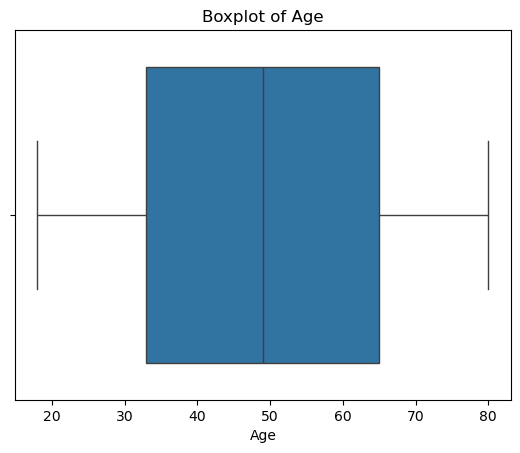

In [366]:
# Histogram
plt.hist(data['Age'], bins=6, edgecolor='black')
plt.title('Histogram of Age')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

In [367]:
summaryNumChildren = data['Number of Children'].describe()
print(summaryNumChildren)

count    413768.000000
mean          1.298972
std           1.237054
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: Number of Children, dtype: float64


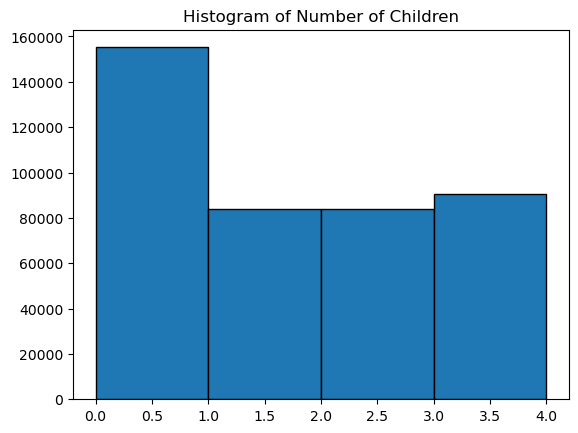

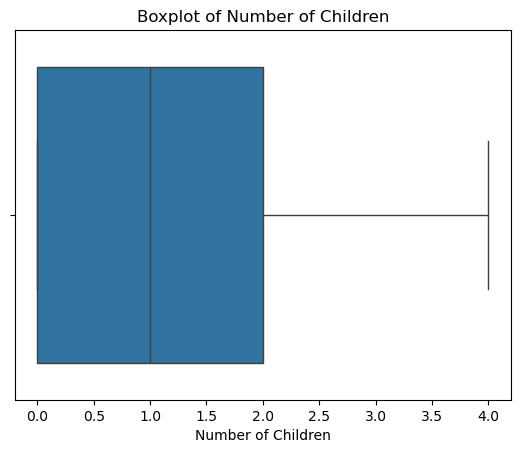

In [368]:
# Histogram
plt.hist(data['Number of Children'], bins=4, edgecolor='black')
plt.title('Histogram of Number of Children')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Number of Children'])
plt.title('Boxplot of Number of Children')
plt.show()

In [369]:
summaryIncome = data['Income'].describe()
print(summaryIncome)

count    413768.000000
mean      50661.707971
std       40624.100565
min           0.410000
25%       21001.030000
50%       37520.135000
75%       76616.300000
max      209995.220000
Name: Income, dtype: float64


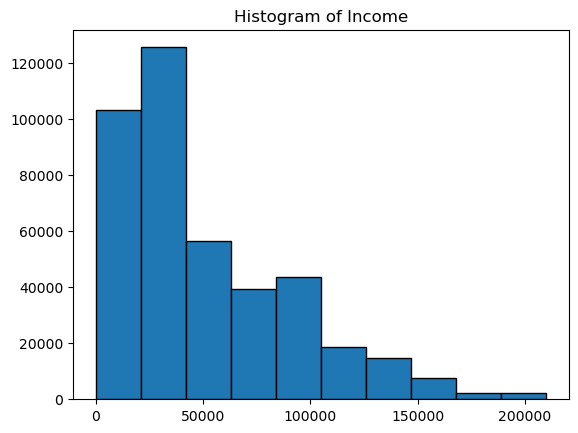

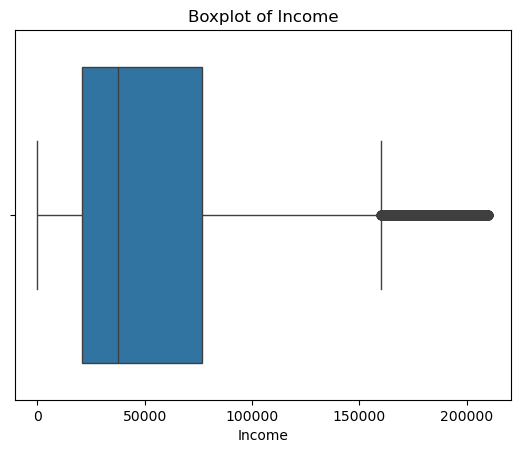

In [370]:
# Histogram
plt.hist(data['Income'], bins=10, edgecolor='black')
plt.title('Histogram of Income')
plt.show()

# Boxplot (outliers)
sns.boxplot(x=data['Income'])
plt.title('Boxplot of Income')
plt.show()

**Investigating and visualizing relationship between categorical features and and depression**

**A) Investigating the breakdown of 'Marital Status' amongst the depressed sample population**

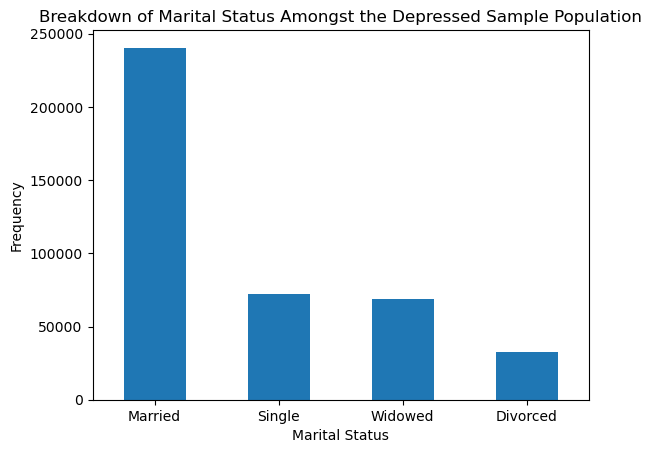

In [373]:
maritalStatusCounts = data['Marital Status'].value_counts()
maritalStatusCounts.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Breakdown of Marital Status Amongst the Depressed Sample Population')
plt.xticks(rotation=0)
plt.show()

The bar graph clearly shows that most of the depressed individuals are married, this suggests an increased association between being married and being depressed. This sets us up nicely for a linear regression analysis down the line to predict how being married can impact depression.

Interestingly, divorced individuals have the lowest frequency amongst our depressed sample population, this might suggest that perhaps being unburdened by a large stress inducing factor (unhealthy relationships) can be associated with positive mental health. We could further investigate the hypothesis that being unburdened by a large stress inducing factor, be it an unhealthy relationship or not worrying about finances, can lead to better mental health through methods such as k-means clustering

**B) Investigating the relationship between having 'Chronic Medical Conditions' and depression**

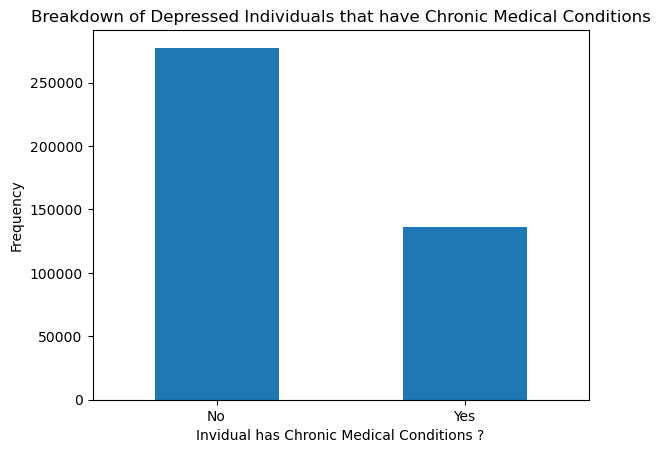

In [377]:
medCount = data['Chronic Medical Conditions'].value_counts()
medCount.plot(kind='bar')
plt.xlabel('Invidual has Chronic Medical Conditions ?')
plt.ylabel('Frequency')
plt.title('Breakdown of Depressed Individuals that have Chronic Medical Conditions')
plt.xticks(rotation=0)
plt.show()

This graph is interesting becuase 'Chronic Medical Conditions' could be causally affected by other lifestlye features in the dataset like 'Smoking Status', 'Physical Activity Level', 'Dietary Habits' and 'Alcohol Consumption', therefore if there was a high frequency of Chronically Ill individuals who are depressed, it could suggest an association between depression and being chronically ill. This graph does not show that, it instead suggests that being chronically ill is not strongly associated with depression, implying that given limited resources and time, investigating the relationship between these lifestlye factors and their effect on health and in turn the potential to reduce probability of developing depression might not yield a significant result.

**Multivariate Analysis :**

**A) Generating a heatmap to investigate correlation between the features**

Data PreProcessing: Encoding all the ordinal categorical variables. 

Mapping and encoding unique education levels:

In [383]:
eduLevels = data["Education Level"].unique()
print(eduLevels)

["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']


In [384]:
eduMap = {
    'High School': 0,
    'Associate Degree': 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    'PhD': 4
}
data["Education Level"] = data["Education Level"].map(eduMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,0,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


**Mapping and Encoding Activity Levels:** 

In [386]:
actLevels = data["Physical Activity Level"].unique()
print(actLevels)

['Active' 'Sedentary' 'Moderate']


In [387]:
actMap = {
    'Sedentary': 0,
    'Moderate': 1,
    'Active': 2
}

data["Physical Activity Level"] = data["Physical Activity Level"].map(actMap)
data.head()


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,2,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,0,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,0,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,1,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,0,0,Non-smoker,0,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


**Mapping and Encoding Alcohol Consmuption, Dietary Habits and Sleep Patterns:**

In [389]:
sleepLevels = data["Sleep Patterns"].unique()
alcLevels = data["Alcohol Consumption"].unique()
dietLevels = data["Dietary Habits"].unique()

print(sleepLevels)
print(alcLevels)
print(dietLevels)

['Fair' 'Good' 'Poor']
['Moderate' 'High' 'Low']
['Moderate' 'Unhealthy' 'Healthy']


In [390]:
sleepMap = {
    'Fair': 1,
    'Good': 2,
    'Poor': 0
}

alcMap = {
    'Moderate':1,
    'High':2,
    'Low': 0
}

dietMap = {
    'Moderate':1,
    'Unhealthy': 0,
    'Healthy': 2
}

data['Sleep Patterns'] = data['Sleep Patterns'].map(sleepMap)
data['Alcohol Consumption'] = data['Alcohol Consumption'].map(alcMap)
data['Dietary Habits'] = data['Dietary Habits'].map(dietMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,Non-smoker,2,Unemployed,26265.67,1,1,1,Yes,No,Yes,Yes
1,55,Married,0,1,Non-smoker,0,Employed,42710.36,2,0,1,Yes,No,No,Yes
2,78,Widowed,3,1,Non-smoker,0,Employed,125332.79,0,0,2,No,No,Yes,No
3,58,Divorced,3,3,Non-smoker,1,Unemployed,9992.78,1,1,0,No,No,No,No
4,18,Single,0,0,Non-smoker,0,Unemployed,8595.08,0,1,1,Yes,No,Yes,Yes


**Encoding of smoking status:**

In [392]:
smokingLevels = data['Smoking Status'].unique()
print(smokingLevels)

['Non-smoker' 'Former' 'Current']


In [393]:
smokeMap = {
    'Non-smoker': 2,
    'Former': 1,
    'Current': 0
}
data['Smoking Status'] = data['Smoking Status'].map(smokeMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,Unemployed,26265.67,1,1,1,Yes,No,Yes,Yes
1,55,Married,0,1,2,0,Employed,42710.36,2,0,1,Yes,No,No,Yes
2,78,Widowed,3,1,2,0,Employed,125332.79,0,0,2,No,No,Yes,No
3,58,Divorced,3,3,2,1,Unemployed,9992.78,1,1,0,No,No,No,No
4,18,Single,0,0,2,0,Unemployed,8595.08,0,1,1,Yes,No,Yes,Yes


In [394]:
yesMap = {
    'Yes': 1,
    'No': 0
}

data['History of Mental Illness'] = data['History of Mental Illness'].map(yesMap)
data['History of Substance Abuse'] = data['History of Substance Abuse'].map(yesMap)
data['Family History of Depression'] = data['Family History of Depression'].map(yesMap)
data['Chronic Medical Conditions'] = data['Chronic Medical Conditions'].map(yesMap)
data.head()


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,Unemployed,26265.67,1,1,1,1,0,1,1
1,55,Married,0,1,2,0,Employed,42710.36,2,0,1,1,0,0,1
2,78,Widowed,3,1,2,0,Employed,125332.79,0,0,2,0,0,1,0
3,58,Divorced,3,3,2,1,Unemployed,9992.78,1,1,0,0,0,0,0
4,18,Single,0,0,2,0,Unemployed,8595.08,0,1,1,1,0,1,1


**Employment Encoding:** 

In [396]:
empLevels = data['Employment Status'].unique()
print(empLevels)

['Unemployed' 'Employed']


In [397]:
empMap = {
    'Unemployed':0,
    'Employed': 1
}

data['Employment Status'] = data['Employment Status'].map(empMap)
data.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,2,2,2,2,0,26265.67,1,1,1,1,0,1,1
1,55,Married,0,1,2,0,1,42710.36,2,0,1,1,0,0,1
2,78,Widowed,3,1,2,0,1,125332.79,0,0,2,0,0,1,0
3,58,Divorced,3,3,2,1,0,9992.78,1,1,0,0,0,0,0
4,18,Single,0,0,2,0,0,8595.08,0,1,1,1,0,1,1


**Correlation Heatmap of all features except marital status (marital status is neither ordinal or binary so it cannot be encoded without imbueing bias):**

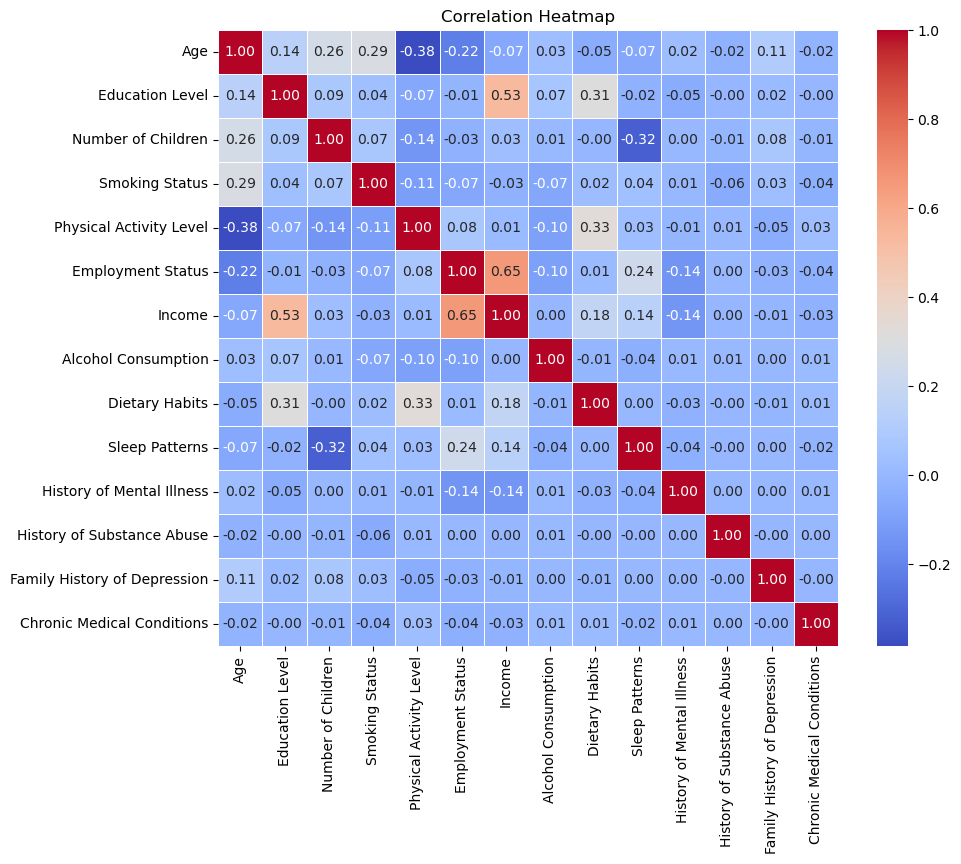

In [399]:
corData = data.drop('Marital Status', axis=1)

corrMat = corData.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrMat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap uncovers alot of interesting relationships between the variables. 

As expected, there is a relatively strong positive correlation between Education Level and Income, this suggests that employment status might be a good predictor of income. Digging deeper into the association of income with depression would allow us to explore whether pursuing higher education would reduce the chances of developing depression because it increases the potential income you could earn. 

Another interesting insight you can glean is the relatively strong negative correlation between Number of Children and Sleep patterns, this suggests that an increasing number of children could predict worse sleeping habits, analysing the relationship between bad sleep and depression could answer questions like "Could having more children lead to an increased chance of developing depression"

A relatively strong negative correlation between Age with employment status and Age with Physical Activity Level could suggest that the older you get, there might be an increased chances of developing depression becuase there is a higher chance of being less active and employed. Exploring the relationship between activity level and Income would help us answer this question. 

Investigating the relationship between sleep patterns and number of children

/var/folders/lp/h4vyw06n19j614hx3tp543w40000gn/T/ipykernel_60710/127129273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Sleep Patterns", y="Number of Children", palette="coolwarm")


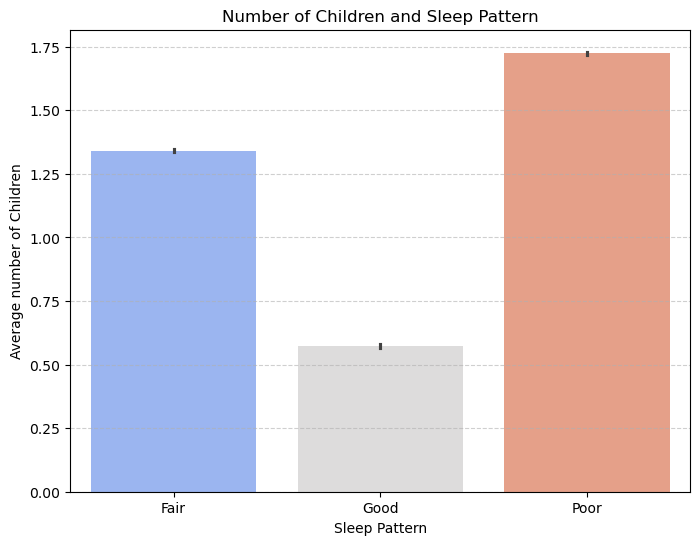

In [402]:
sleep_labels = {0: "Poor", 1: "Fair", 2: "Good"}
data["Sleep Patterns"] = data["Sleep Patterns"].map(sleep_labels)
plt.figure(figsize=(8,6))
sns.barplot(data=data, x="Sleep Patterns", y="Number of Children", palette="coolwarm")
plt.xlabel("Sleep Pattern")
plt.ylabel("Average number of Children")
plt.title("Number of Children and Sleep Pattern")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

The bar graph is to observe the relationship between the pattern of sleep and the number of children. This is to investigate factors that associate with depression which one of them being sleep. We wanted to observe how different variables affect sleep. In this case we decided to use the number of children.